# **Importing and Installing Library**

In [ ]:
pip install numpy


In [ ]:
pip install opencv-python


In [ ]:
pip install tensorflow

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Conv2D
from sklearn.model_selection import train_test_split

# **Load Dataset MNIST**

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


11490434/11490434 [==============================] - 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# **Data preprocessing cleaning**

In [ ]:
x_train = tf.keras.utils.normalize(x_train , axis=1)
x_test = tf.keras.utils.normalize(x_test , axis=1)

# **Splitting data to train, validation and test data**

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# **First Model**

In [ ]:
first_model = tf.keras.models.Sequential()  #Initializes a sequential model to create a neural network by adding layers in sequence
first_model.add(tf.keras.layers.Flatten(input_shape=(28,28))) #Adding a Flatten layer to the model converting it to 1D array
first_model.add(tf.keras.layers.Dense(128,activation='relu')) #Adding a dense layers (fully connected) with 128 neurons | ReLU (Rectified Linear Unit) activation function
first_model.add(tf.keras.layers.Dense(128,activation='relu'))
first_model.add(tf.keras.layers.Dropout(0.5)) #Adding a Dropout layer to prevent overfitting with dropout rate = 0.5
first_model.add(tf.keras.layers.Dense(10,activation='softmax')) #Adding the output layer with 10 neurons (10 classes) | Softmax activation function suitable for multi-class classification

first_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("---------------------------------------------------------------------------")
fit = first_model.fit(x_train, y_train, epochs=1, validation_split=0.1) #training the model on the training data for 3 epochs (iterations)
print("---------------------------------------------------------------------------")
first_model.summary()
print("---------------------------------------------------------------------------")
loss, accuracy = first_model.evaluate(x_test, y_test)
print("Loss -> ", loss)
print("Accuracy -> ", accuracy*100,'%')
first_model.save('DigitRecognition1.model')


---------------------------------------------------------------------------
1519/1519 [==============================] - 17s 11ms/step - loss: 0.7892 - accuracy: 0.7547 - val_loss: 0.3044 - val_accuracy: 0.9128
---------------------------------------------------------------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 128)               16512     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (N

# **Second Model**

In [ ]:
second_model = tf.keras.models.Sequential()
second_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
second_model.add(tf.keras.layers.Dense(512,activation='relu'))
second_model.add(tf.keras.layers.Dense(256,activation='relu'))
second_model.add(tf.keras.layers.Dense(128,activation='relu'))
second_model.add(tf.keras.layers.Dense(64,activation='relu'))
second_model.add(tf.keras.layers.Dense(10,activation='softmax'))

second_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("---------------------------------------------------------------------------")
fit = second_model.fit(x_train, y_train, epochs=5, validation_split=0.1)
print("---------------------------------------------------------------------------")
second_model.summary()
print("---------------------------------------------------------------------------")
loss, accuracy = second_model.evaluate(x_test, y_test)
print("Loss -> ", loss)
print("Accuracy -> ", accuracy*100,'%')
first_model.save('DigitRecognition2.model')

---------------------------------------------------------------------------
Epoch 1/5
1519/1519 [==============================] - 18s 11ms/step - loss: 0.2441 - accuracy: 0.9263 - val_loss: 0.1288 - val_accuracy: 0.9611
Epoch 2/5
1519/1519 [==============================] - 18s 12ms/step - loss: 0.1051 - accuracy: 0.9680 - val_loss: 0.1110 - val_accuracy: 0.9685
Epoch 3/5
1519/1519 [==============================] - 17s 11ms/step - loss: 0.0706 - accuracy: 0.9777 - val_loss: 0.1018 - val_accuracy: 0.9694
Epoch 4/5
1519/1519 [==============================] - 18s 12ms/step - loss: 0.0531 - accuracy: 0.9835 - val_loss: 0.1017 - val_accuracy: 0.9681
Epoch 5/5
1519/1519 [==============================] - 17s 11ms/step - loss: 0.0412 - accuracy: 0.9866 - val_loss: 0.0980 - val_accuracy: 0.9730
---------------------------------------------------------------------------
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output

# **Third Model**

In [ ]:
third_model = tf.keras.models.Sequential()
third_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
third_model.add(tf.keras.layers.Dense(1024,activation='relu'))
third_model.add(tf.keras.layers.Dropout(0.1))
third_model.add(tf.keras.layers.Dense(512,activation='relu'))
third_model.add(tf.keras.layers.Dropout(0.1))
third_model.add(tf.keras.layers.Dense(256,activation='relu'))
third_model.add(tf.keras.layers.Dropout(0.1))
third_model.add(tf.keras.layers.Dense(128,activation='relu'))
third_model.add(tf.keras.layers.Dropout(0.1))
third_model.add(tf.keras.layers.Dense(64,activation='relu'))
third_model.add(tf.keras.layers.Dropout(0.1))
third_model.add(tf.keras.layers.Dense(10,activation='softmax'))

third_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("---------------------------------------------------------------------------")
fit = third_model.fit(x_train, y_train, epochs=5, validation_split=0.1)
print("---------------------------------------------------------------------------")
third_model.summary()
print("---------------------------------------------------------------------------")
loss, accuracy = third_model.evaluate(x_test, y_test)
print("Loss -> ", loss)
print("Accuracy -> ", accuracy*100,'%')
third_model.save('DigitRecognition3.model')

---------------------------------------------------------------------------
Epoch 1/5
1519/1519 [==============================] - 43s 27ms/step - loss: 0.2905 - accuracy: 0.9144 - val_loss: 0.1461 - val_accuracy: 0.9581
Epoch 2/5
1519/1519 [==============================] - 41s 27ms/step - loss: 0.1337 - accuracy: 0.9633 - val_loss: 0.1508 - val_accuracy: 0.9556
Epoch 3/5
1519/1519 [==============================] - 43s 28ms/step - loss: 0.0969 - accuracy: 0.9729 - val_loss: 0.1254 - val_accuracy: 0.9685
Epoch 4/5
1519/1519 [==============================] - 43s 28ms/step - loss: 0.0821 - accuracy: 0.9768 - val_loss: 0.1021 - val_accuracy: 0.9713
Epoch 5/5
1519/1519 [==============================] - 40s 27ms/step - loss: 0.0657 - accuracy: 0.9822 - val_loss: 0.1230 - val_accuracy: 0.9724
---------------------------------------------------------------------------
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output

# **Fourth Model**

In [ ]:
fourth_model = tf.keras.models.Sequential()
fourth_model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))) #32 filters to extract features
fourth_model.add(tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
fourth_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
fourth_model.add(tf.keras.layers.Flatten())
fourth_model.add(tf.keras.layers.Dense(256, activation='relu'))
fourth_model.add(tf.keras.layers.Dropout(0.5))
fourth_model.add(tf.keras.layers.Dense(128, activation='relu'))
fourth_model.add(tf.keras.layers.Dropout(0.5))
fourth_model.add(tf.keras.layers.Dense(10, activation='softmax'))

fourth_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("---------------------------------------------------------------------------")
fit = fourth_model.fit(x_train, y_train, epochs=5, validation_split=0.1)
print("---------------------------------------------------------------------------")
fourth_model.summary()
print("---------------------------------------------------------------------------")
loss, accuracy = fourth_model.evaluate(x_test, y_test)
print("Loss -> ", loss)
print("Accuracy -> ", accuracy*100,'%')
first_model.save('DigitRecognition4.model')

---------------------------------------------------------------------------
Epoch 1/5
1519/1519 [==============================] - 164s 107ms/step - loss: 0.2835 - accuracy: 0.9171 - val_loss: 0.0629 - val_accuracy: 0.9800
Epoch 2/5
1519/1519 [==============================] - 160s 105ms/step - loss: 0.0982 - accuracy: 0.9735 - val_loss: 0.0505 - val_accuracy: 0.9844
Epoch 3/5
1519/1519 [==============================] - 160s 105ms/step - loss: 0.0715 - accuracy: 0.9799 - val_loss: 0.0425 - val_accuracy: 0.9881
Epoch 4/5
1519/1519 [==============================] - 160s 105ms/step - loss: 0.0521 - accuracy: 0.9852 - val_loss: 0.0453 - val_accuracy: 0.9874
Epoch 5/5
1519/1519 [==============================] - 157s 103ms/step - loss: 0.0458 - accuracy: 0.9871 - val_loss: 0.0508 - val_accuracy: 0.9865
---------------------------------------------------------------------------
Model: "sequential_5"
_________________________________________________________________
 Layer (type)            

# **Predict function**

--------------------------------------------------------------------------
First Model
1/1 [==============================] - 1s 1s/step


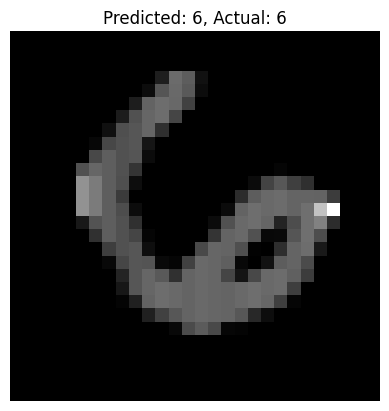

1/1 [==============================] - 0s 24ms/step


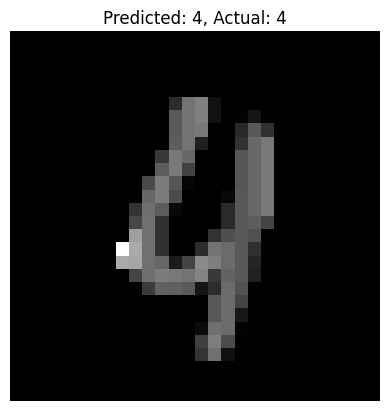

1/1 [==============================] - 0s 23ms/step


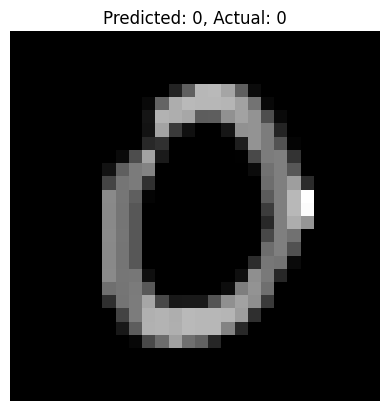

1/1 [==============================] - 0s 27ms/step


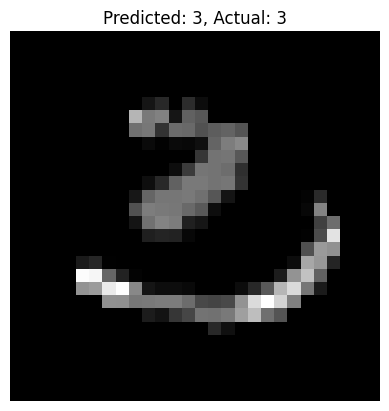

1/1 [==============================] - 0s 24ms/step


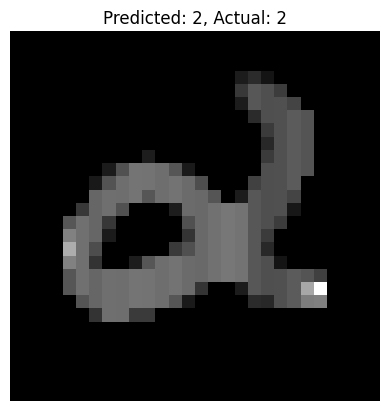

1/1 [==============================] - 0s 25ms/step


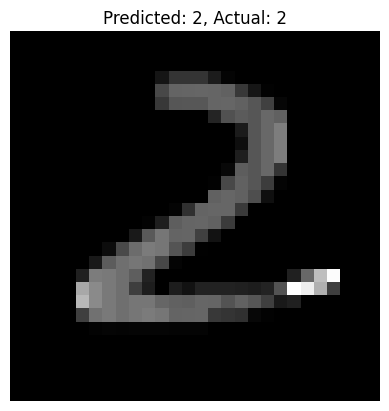

1/1 [==============================] - 0s 25ms/step


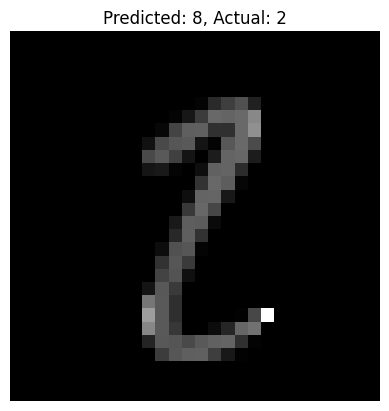

1/1 [==============================] - 0s 24ms/step


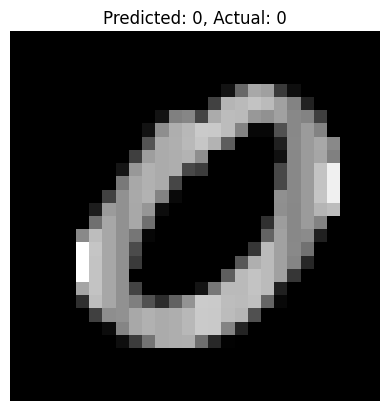

1/1 [==============================] - 0s 24ms/step


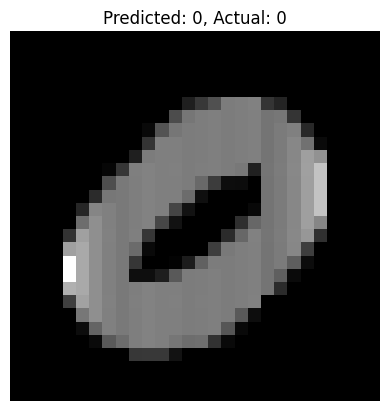

1/1 [==============================] - 0s 25ms/step


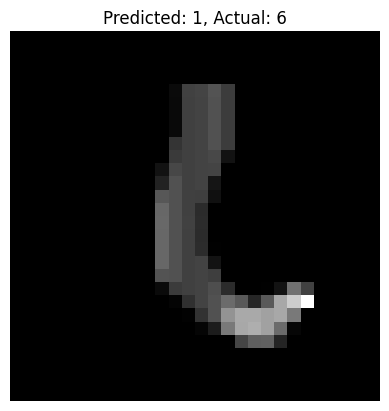

--------------------------------------------------------------------------
Second Model
1/1 [==============================] - 0s 75ms/step


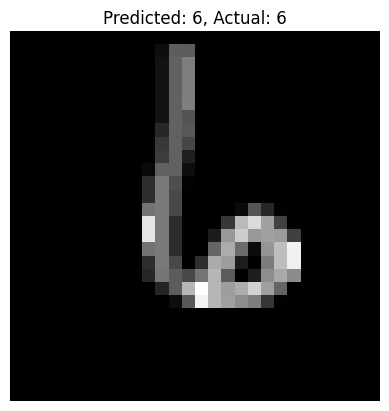

1/1 [==============================] - 0s 24ms/step


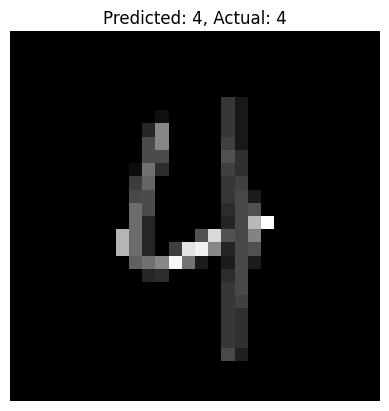

1/1 [==============================] - 0s 23ms/step


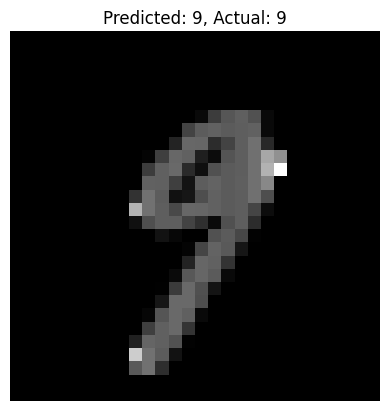

1/1 [==============================] - 0s 24ms/step


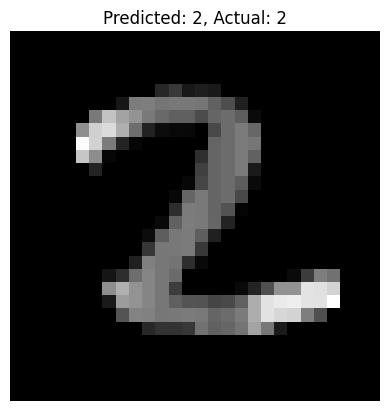

1/1 [==============================] - 0s 26ms/step


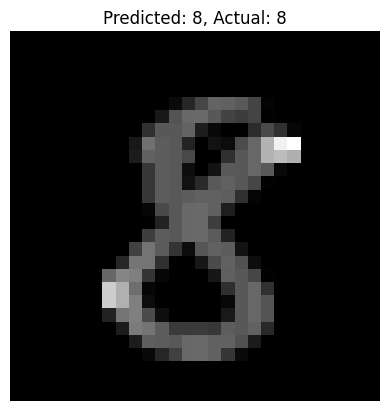

1/1 [==============================] - 0s 24ms/step


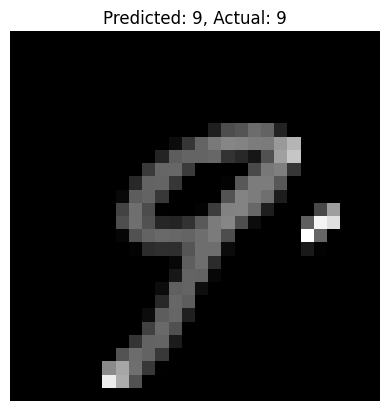

1/1 [==============================] - 0s 25ms/step


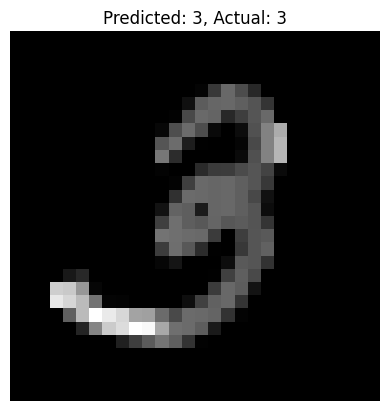

1/1 [==============================] - 0s 23ms/step


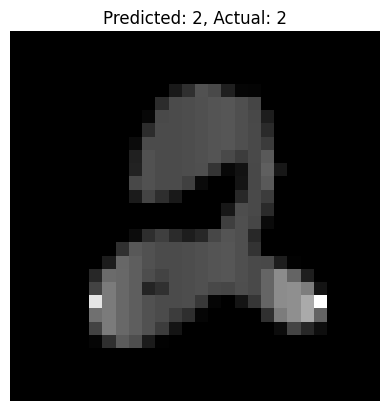

1/1 [==============================] - 0s 25ms/step


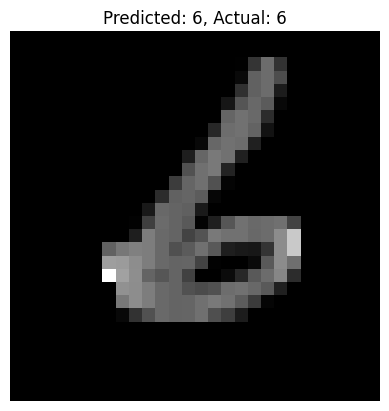

1/1 [==============================] - 0s 23ms/step


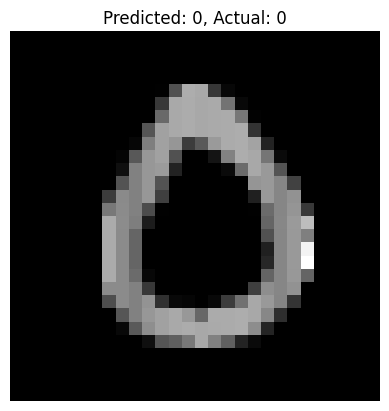

--------------------------------------------------------------------------
Third Model
1/1 [==============================] - 0s 93ms/step


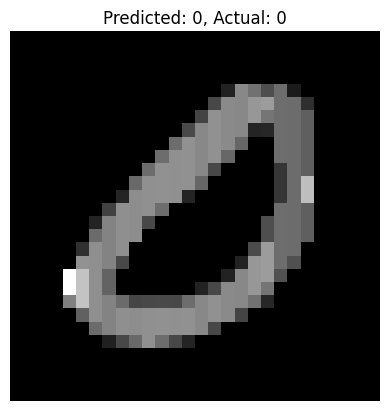

1/1 [==============================] - 0s 23ms/step


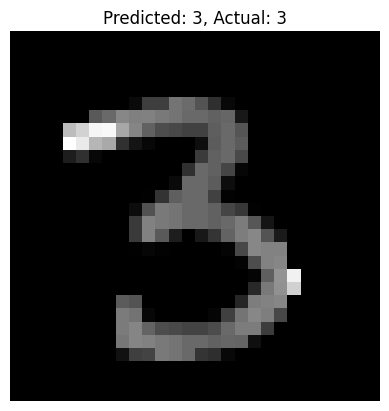

1/1 [==============================] - 0s 22ms/step


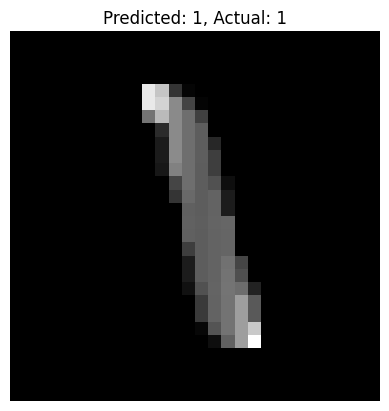

1/1 [==============================] - 0s 24ms/step


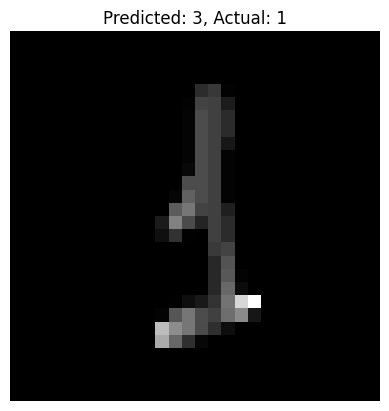

1/1 [==============================] - 0s 28ms/step


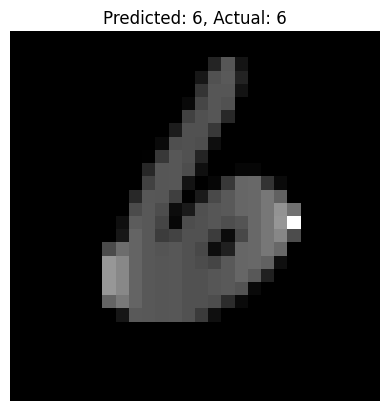

1/1 [==============================] - 0s 23ms/step


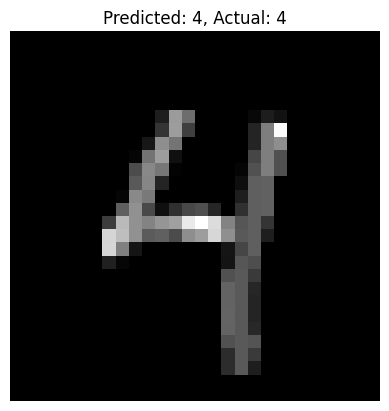

1/1 [==============================] - 0s 22ms/step


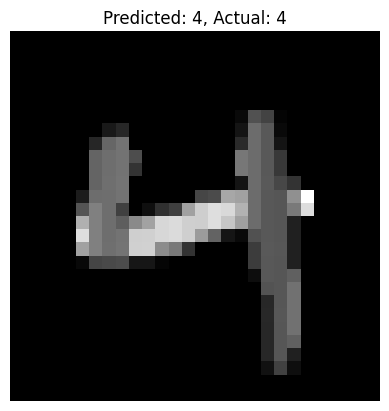

1/1 [==============================] - 0s 26ms/step


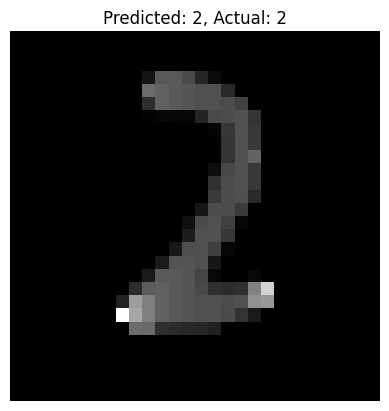

1/1 [==============================] - 0s 22ms/step


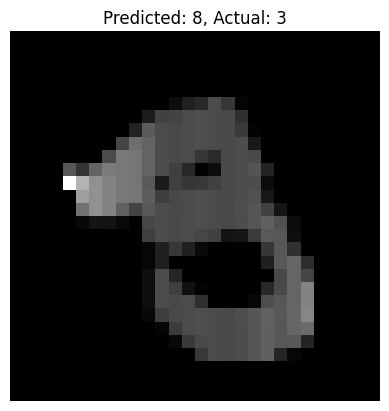

1/1 [==============================] - 0s 24ms/step


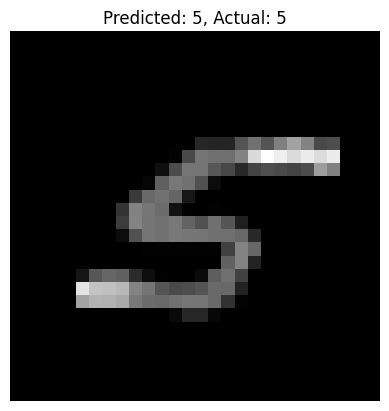

--------------------------------------------------------------------------
Fourth Model
1/1 [==============================] - 0s 65ms/step


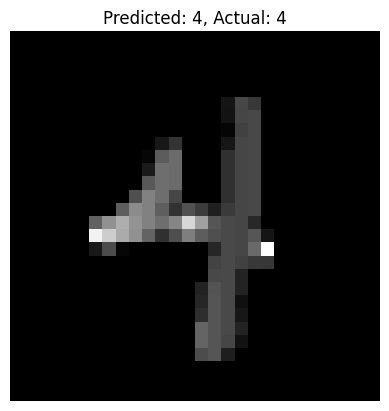

1/1 [==============================] - 0s 23ms/step


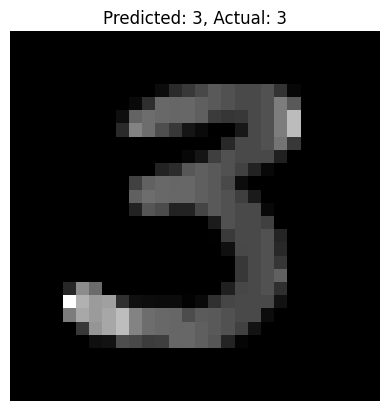

1/1 [==============================] - 0s 23ms/step


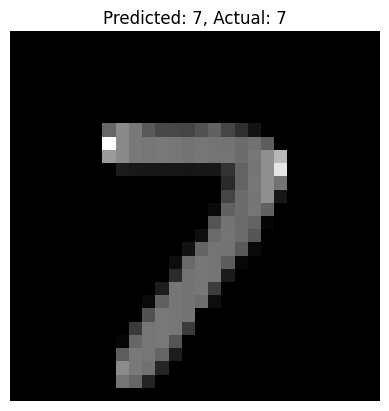

1/1 [==============================] - 0s 24ms/step


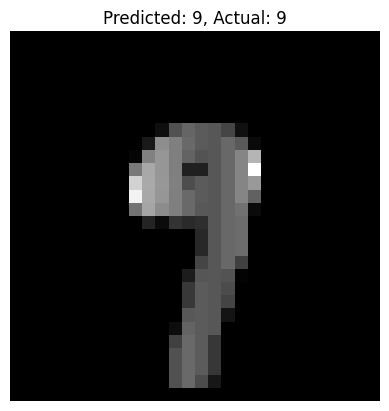

1/1 [==============================] - 0s 23ms/step


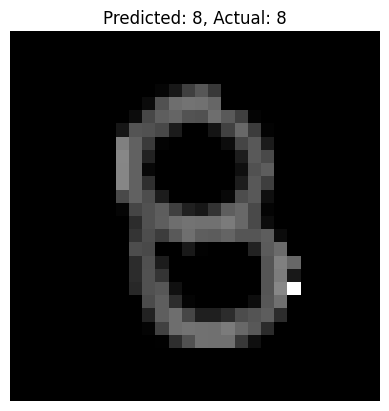

1/1 [==============================] - 0s 21ms/step


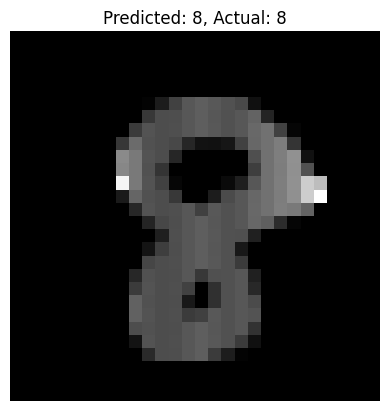

1/1 [==============================] - 0s 22ms/step


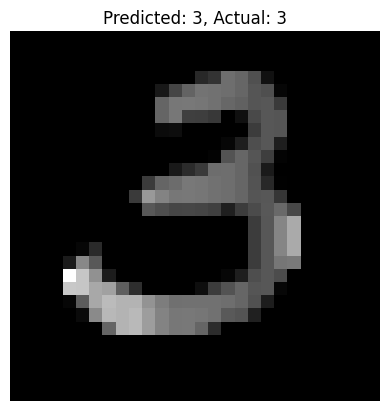

1/1 [==============================] - 0s 21ms/step


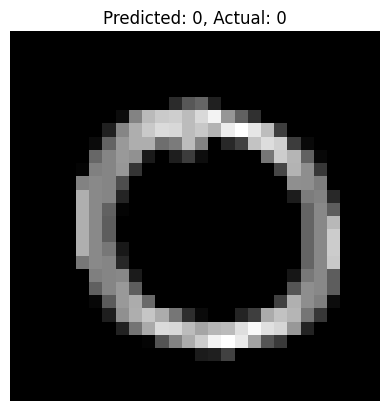

1/1 [==============================] - 0s 23ms/step


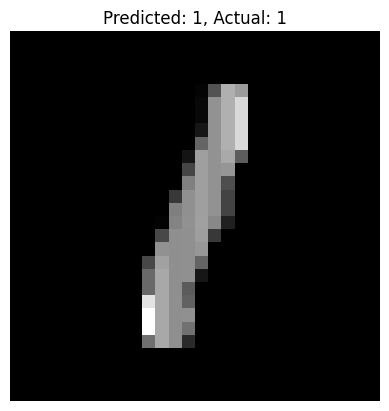

1/1 [==============================] - 0s 29ms/step


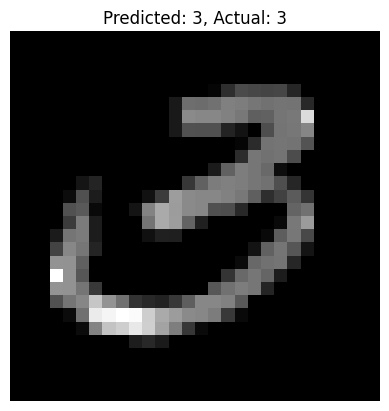

In [ ]:
print("--------------------------------------------------------------------------")
print("First Model")
# Load the model
model = tf.keras.models.load_model('DigitRecognition1.model')

# Select 10 random indices from the test set
random_indices = np.random.choice(len(x_test), size=10, replace=False)

# Iterate over the selected indices
for idx in random_indices:
    # Get the image and its corresponding label
    test_image = x_test[idx]
    actual_label = y_test[idx]

    # Make prediction
    prediction = model.predict(test_image)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Display the image
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_label}")
    plt.show()

print("--------------------------------------------------------------------------")
print("Second Model")
# Load the mode2
model = tf.keras.models.load_model('DigitRecognition2.model')

# Select 10 random indices from the test set
random_indices = np.random.choice(len(x_test), size=10, replace=False)

# Iterate over the selected indices
for idx in random_indices:
    # Get the image and its corresponding label
    test_image = x_test[idx]
    actual_label = y_test[idx]

    # Make prediction
    prediction = model.predict(test_image)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Display the image
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_label}")
    plt.show()

print("--------------------------------------------------------------------------")
print("Third Model")
# Load the mode3
model = tf.keras.models.load_model('DigitRecognition3.model')

# Select 10 random indices from the test set
random_indices = np.random.choice(len(x_test), size=10, replace=False)

# Iterate over the selected indices
for idx in random_indices:
    # Get the image and its corresponding label
    test_image = x_test[idx]
    actual_label = y_test[idx]

    # Make prediction
    prediction = model.predict(test_image)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Display the image
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_label}")
    plt.show()


print("--------------------------------------------------------------------------")
print("Fourth Model")
# Load the mode4
model = tf.keras.models.load_model('DigitRecognition4.model')

# Select 10 random indices from the test set
random_indices = np.random.choice(len(x_test), size=10, replace=False)

# Iterate over the selected indices
for idx in random_indices:
    # Get the image and its corresponding label
    test_image = x_test[idx]
    actual_label = y_test[idx]

    # Make prediction
    prediction = model.predict(test_image)

    # Get the predicted class
    predicted_class = np.argmax(prediction)

    # Display the image
    plt.imshow(test_image.squeeze(), cmap='gray')
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class}, Actual: {actual_label}")
    plt.show()